In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


In [2]:
weather_df = pd.read_csv('kanpur.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,11,21,17,50,0.0,1015,11,10,320,10
2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,22,11,52,0.0,1015,11,10,315,11
2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,6,55,0.0,1015,11,10,310,11
2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,0,57,0.0,1015,10,10,304,12
2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,14,19,0,54,0.0,1016,11,10,302,11


In [3]:
weather_df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [4]:
weather_df.shape

(96432, 24)

In [5]:
weather_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.00000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,33.400199,22.374564,0.0,11.037805,6.877053,4.465012,46.094077,13.230629,30.735783,30.86884,29.088384,14.211766,16.993550,44.370479,0.037756,1006.217946,27.429577,9.885214,205.537270,9.734092
std,6.994211,7.635253,0.0,2.152973,1.551294,3.414374,31.249725,8.053778,9.320398,9.17754,8.051981,6.926605,23.150025,22.484991,0.307143,7.593850,8.459575,1.058515,104.369548,4.835331
min,15.000000,3.000000,0.0,4.000000,3.000000,1.000000,0.000000,-14.000000,4.000000,7.00000,4.000000,0.000000,0.000000,2.000000,0.000000,986.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,16.000000,0.0,8.700000,6.000000,1.000000,18.000000,7.000000,24.000000,25.00000,24.000000,9.000000,0.000000,26.000000,0.000000,1000.000000,21.000000,10.000000,101.000000,6.000000
50%,34.000000,24.000000,0.0,11.600000,7.000000,5.000000,46.000000,12.000000,31.000000,31.00000,29.000000,14.000000,5.000000,42.000000,0.000000,1006.000000,28.000000,10.000000,240.000000,9.000000
75%,38.000000,28.000000,0.0,13.000000,8.000000,8.000000,73.000000,21.000000,38.000000,38.00000,35.000000,18.000000,27.000000,61.000000,0.000000,1013.000000,33.000000,10.000000,299.000000,12.000000
max,51.000000,39.000000,0.0,13.900000,11.000000,11.000000,100.000000,31.000000,65.000000,65.00000,54.000000,75.000000,100.000000,100.000000,20.600000,1024.000000,50.000000,20.000000,360.000000,47.000000


In [6]:
weather_df.isnull().any()

maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
dtype: bool

In [7]:
weather_df_num=weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
weather_df_num.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2009-01-01 00:00:00,24,10,17,50,11,8.7,12,0.0,1015,10
2009-01-01 01:00:00,24,10,11,52,11,8.7,13,0.0,1015,11
2009-01-01 02:00:00,24,10,6,55,11,8.7,13,0.0,1015,11
2009-01-01 03:00:00,24,10,0,57,10,8.7,13,0.0,1015,12
2009-01-01 04:00:00,24,10,0,54,11,8.7,14,0.0,1016,11


In [8]:
weather_df_num.shape

(96432, 10)

In [9]:
weather_df_num.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

In [10]:
weth=weather_df_num['2019':'2020']
weth.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2019-01-01 00:00:00,26,15,0,46,17,8.7,17,0.0,1020,7
2019-01-01 01:00:00,26,15,0,46,17,8.7,17,0.0,1019,7
2019-01-01 02:00:00,26,15,0,47,16,8.7,16,0.0,1019,7
2019-01-01 03:00:00,26,15,0,48,16,8.7,16,0.0,1019,6
2019-01-01 04:00:00,26,15,0,48,16,8.7,16,0.0,1019,6


In [11]:
weather_y=weather_df_num.pop("tempC")
weather_x=weather_df_num

In [12]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [13]:
train_X.shape

(77145, 9)

In [14]:
train_y.shape

(77145,)

In [15]:
train_y.head()

date_time
2012-03-13 07:00:00    22
2009-11-05 21:00:00    21
2017-10-11 22:00:00    30
2019-06-08 11:00:00    47
2019-03-06 05:00:00    18
Name: tempC, dtype: int64

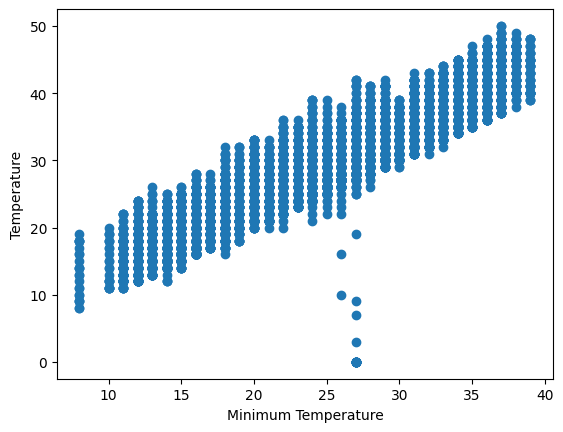

In [16]:
plt.scatter(weth.mintempC, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

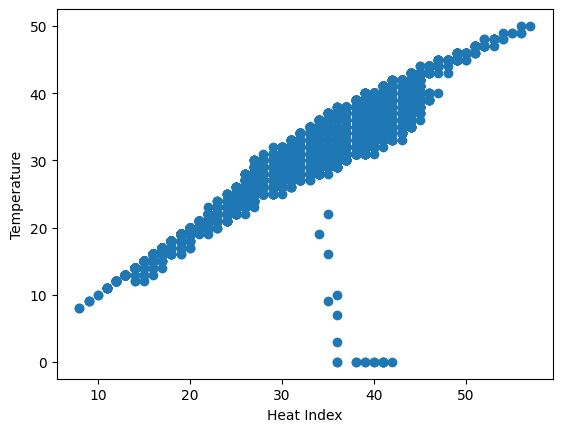

In [17]:
plt.scatter(weth.HeatIndexC, weth.tempC)
plt.xlabel("Heat Index")
plt.ylabel("Temperature")
plt.show()

In [18]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [19]:
prediction = model.predict(test_X)

In [ ]:
np.mean(np.absolute(prediction-test_y()